## Time series plot

In [1]:
# Versão da Linguagem Python

from platform import python_version
print('Versão de Python Neste Jupyter Notebook:', python_version())

Versão de Python Neste Jupyter Notebook: 3.10.5


In [2]:
#imports necessários

import numpy as np                    # manipulação numerica
import pandas as pd                   # manipulação de dados
import matplotlib.pyplot as plt       # visualização gráfica
import matplotlib
import warnings                       # silecio de alertas

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
print('Author: Caique Miranda')
print('Github username: caiquemiranda')
print('\n')
# versões utilizadas nesse Notebook.

print(f'Versão do Numpy {np.__version__}')
print(f'Versão do Pandas {pd.__version__}')
print(f'Versão do Matplotlib {matplotlib.__version__}')

Author: Caique Miranda
Github username: caiquemiranda


Versão do Numpy 1.23.0
Versão do Pandas 1.4.3
Versão do Matplotlib 3.5.2


In [4]:
plt.rcParams['figure.figsize']= [8, 4]
plt.rcParams['figure.dpi']= 140

In [5]:
temperatures= pd.read_csv('data/daily_temperature.csv')
temperatures.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [7]:
temperatures= pd.read_csv('data/daily_temperature.csv', parse_dates= True)
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [8]:
temperatures['Date']= pd.to_datetime(temperatures['Date'])
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [9]:
temperatures.set_index('Date', inplace= True)

In [10]:
temperatures.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


### Line plot and Scatter plot

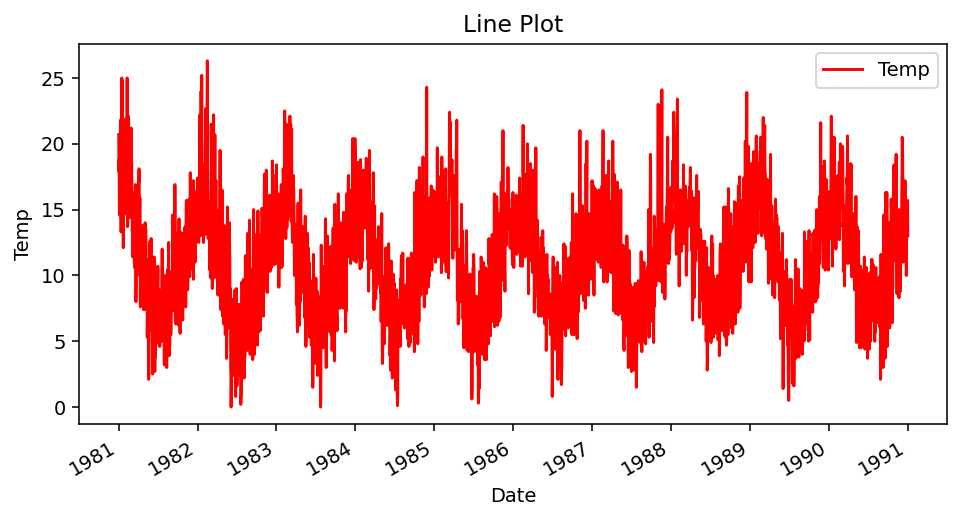

In [11]:
temperatures.plot(color= 'red');
plt.ylabel('Temp')
plt.title('Line Plot')
plt.show();

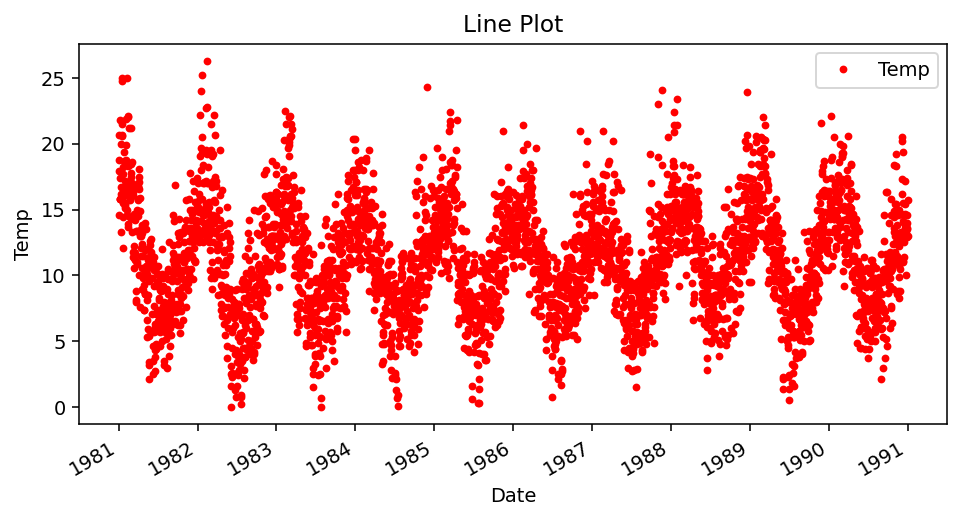

In [12]:
temperatures.plot(style= '.', color= 'red');
plt.ylabel('Temp')
plt.title('Line Plot')
plt.show();

### Subplots

In [13]:
groups= temperatures.groupby(pd.Grouper(freq= 'A'))  # 

In [14]:
keys= groups.groups.keys()

In [15]:
keys

dict_keys([Timestamp('1981-12-31 00:00:00', freq='A-DEC'), Timestamp('1982-12-31 00:00:00', freq='A-DEC'), Timestamp('1983-12-31 00:00:00', freq='A-DEC'), Timestamp('1984-12-31 00:00:00', freq='A-DEC'), Timestamp('1985-12-31 00:00:00', freq='A-DEC'), Timestamp('1986-12-31 00:00:00', freq='A-DEC'), Timestamp('1987-12-31 00:00:00', freq='A-DEC'), Timestamp('1988-12-31 00:00:00', freq='A-DEC'), Timestamp('1989-12-31 00:00:00', freq='A-DEC'), Timestamp('1990-12-31 00:00:00', freq='A-DEC')])

In [16]:
groups.get_group('1981-12-31')

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1981-12-27,15.5
1981-12-28,13.3
1981-12-29,15.6


In [17]:
years= pd.DataFrame()

for key in keys:
    years[key] = groups.get_group(key)['Temp'].values

In [18]:
years

,1981-12-31,1982-12-31,1983-12-31,1984-12-31,1985-12-31,1986-12-31,1987-12-31,1988-12-31,1989-12-31,1990-12-31
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


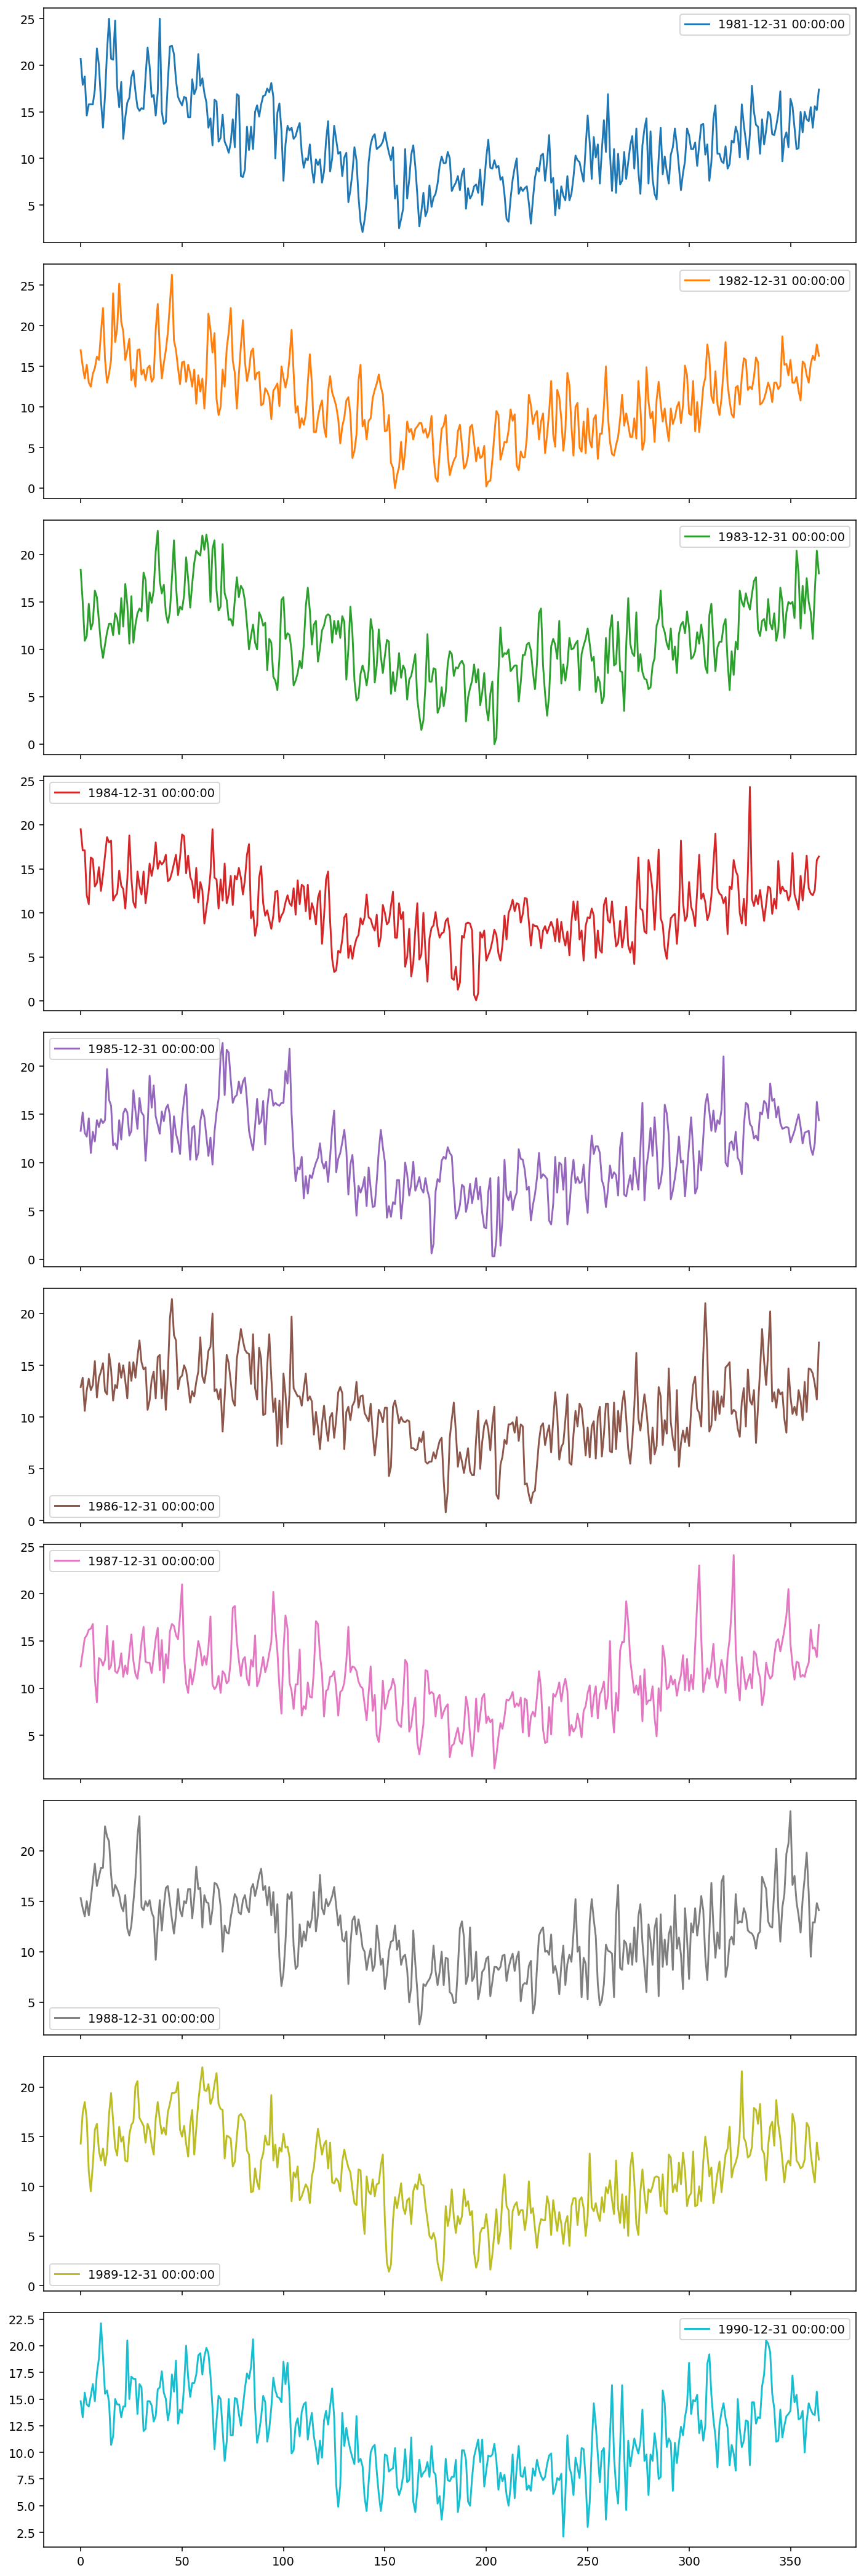

In [19]:
years.plot(subplots= True, figsize=(10, 30))
plt.tight_layout()
plt.show();

### Heatmap

In [20]:
years

,1981-12-31,1982-12-31,1983-12-31,1984-12-31,1985-12-31,1986-12-31,1987-12-31,1988-12-31,1989-12-31,1990-12-31
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


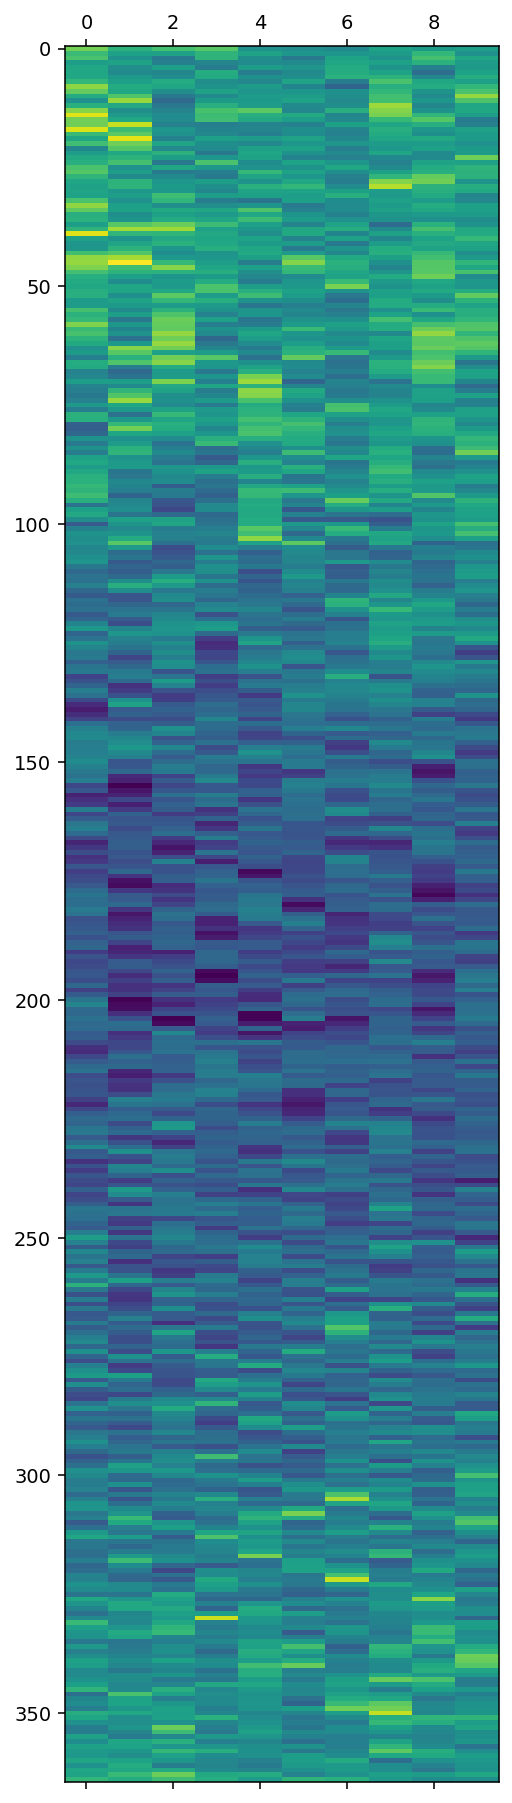

In [21]:
plt.matshow(years, aspect= 'auto')
plt.show();

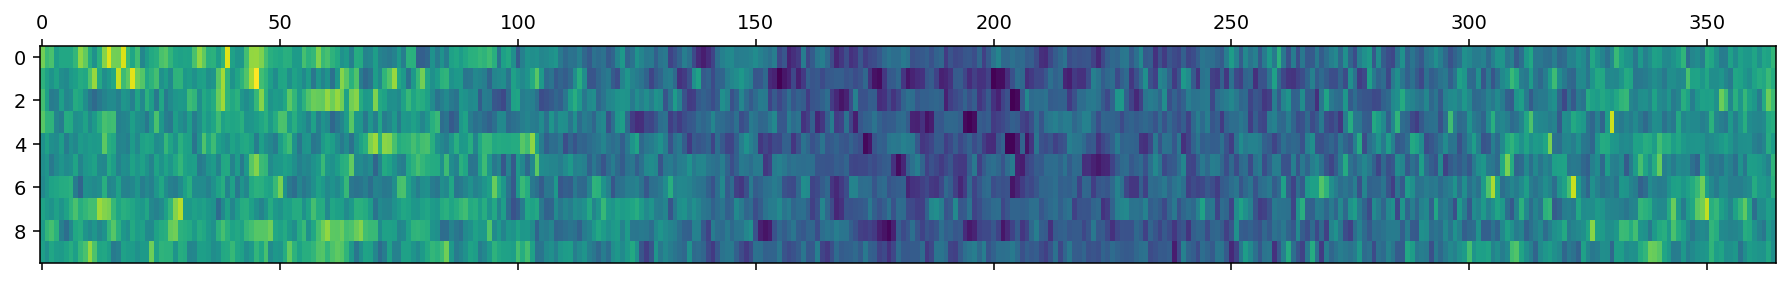

In [22]:
plt.matshow(years.T, aspect= 'auto')
plt.show();

### Histogram and KDE plot

In [23]:
temperatures.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


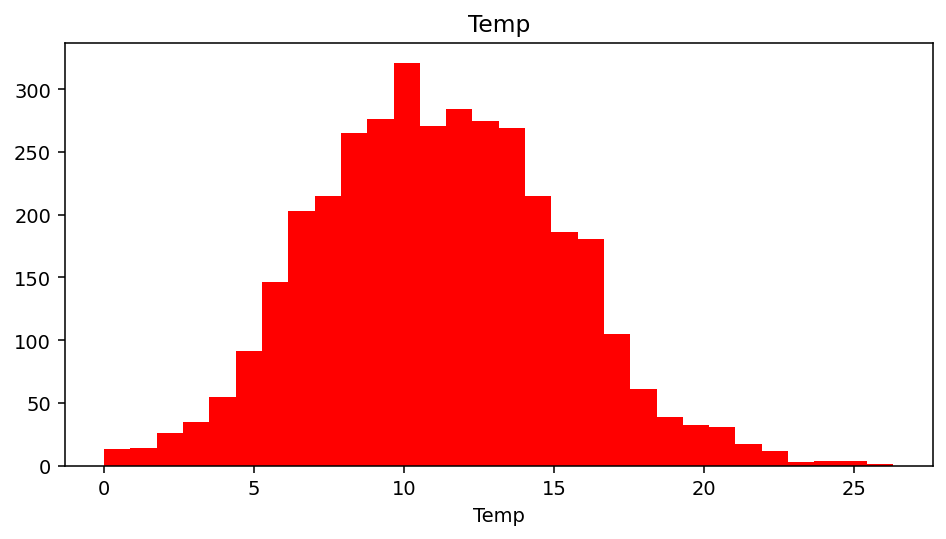

In [24]:
temperatures.hist(bins= 30, 
                  grid= False, 
                  color= 'red')

plt.xlabel('Temp')
plt.show();

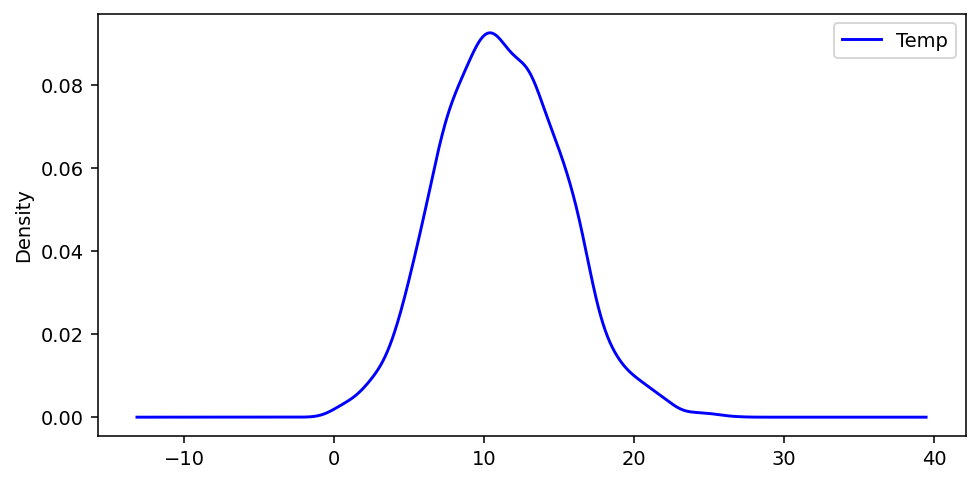

In [25]:
temperatures.plot(kind= 'kde', color= 'blue')
plt.show();

### End.